In [1]:
from BoxBasis import *
import torch

In [2]:
device = 'cuda:0'
thetas = torch.linspace(0, torch.pi, 120).to(device).double()

In [3]:
box_basis = BoxBasis(load=False)
with torch.no_grad():
    box_basis.construct_x_ray_look_up(thetas, name='saved_results/x_ray_look_up_exp_120_pi.pickle')
    box_basis.construct_x_ray_look_up_torch()

In [4]:
N_y = 1000
y_values = torch.linspace(-1.5, 1.5, N_y)[:, None, None]
X = torch.zeros((N_y, 120, 1, 1))
for i, theta in enumerate(thetas): 
    X[:, i:i+1] = box_basis.x_ray(i, y_values)

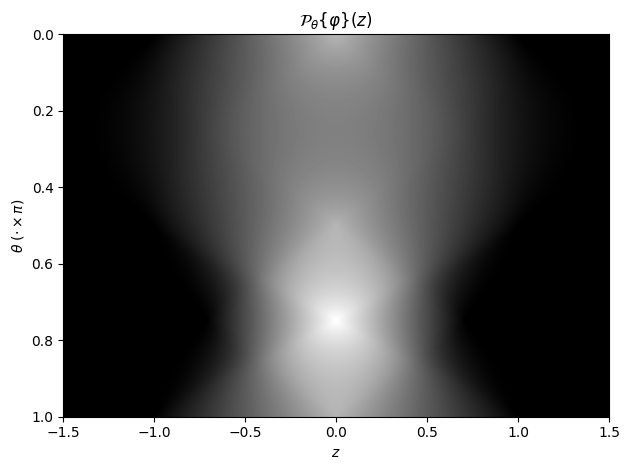

In [8]:
from matplotlib import pyplot as plt
im = plt.imshow(X[:, :, 0, 0].transpose(1, 0), cmap='gray', extent=[-1.5, 1.5, 1, 0], aspect="auto")
plt.xlabel('$z$')
plt.ylabel(r'$\theta$ ($\cdot \times \pi$)')
plt.title(r'$\mathcal{P}_{\theta}\{\varphi\}(z)$')
ax = plt.gca()
plt.tight_layout()
plt.savefig('box_and_proj.png')
plt.show()